In [1]:
import pandas as pd
from pprint import pprint
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
import platform
import numpy as np
from matplotlib import font_manager, rc
%matplotlib inline
from tqdm import tqdm_notebook
from ckonlpy.tag import Twitter #pip install customized_konlpy
twitter = Twitter()

C:\Users\manue\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# 전처리된 제품이름을 추가 전 실행

In [2]:
twitter.nouns('임팩타민정')

['임팩타', '민정']

In [3]:
twitter.nouns('새니타이저겔')

['타이', '저겔']

In [4]:
twitter.nouns('핸드새니타이저겔')

['핸드', '타이', '저겔']

In [5]:
twitter.nouns('이지엔6이브')

['이지', '이브']

# 전처리된 제품이름 파일을 불러옴

In [6]:
goods_df = pd.read_csv('전처리/제품이름_전처리.csv')
goods_df.head()

,Unnamed: 0,GOODS_NM,goods_kor
0,일회용주사기(D/Syringe),173,일회용주사기
1,일회용주사침 (D/Needles),123,일회용주사침
2,포리카테타 (FOLEY CATHETER) - SILICONE,61,포리카테타
3,접은거즈(FoldGauze),58,접은거즈
4,일회용주사기(D/Syringe)-카톤,51,일회용주사기


# Nan 데이터를 제거함

In [7]:
goods_df['goods_kor'].isnull().sum()

47

In [8]:
goods_df.dropna(inplace=True)

In [9]:
goods_df['goods_kor'].isnull().sum()

0

In [10]:
goods_df.reset_index(inplace = True)

# ckonlpy에다가 전처리된 제품이름을 일일히 추가

In [11]:
for i in tqdm_notebook(range(0,goods_df.shape[0])):
    if type(goods_df.iloc[i]['goods_kor']) != type(np.nan):
        twitter.add_dictionary(goods_df.iloc[i]['goods_kor'].strip(), 'Noun')

<ipython-input-11-40d2a2289a3e>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,goods_df.shape[0])):


In [12]:
twitter.add_dictionary('크린투크린', 'Noun')
twitter.add_dictionary('새니타이저'.strip(), 'Noun')
twitter.add_dictionary('다이아벡스'.strip(), 'Noun')
twitter.add_dictionary('사리돈에이'.strip(), 'Noun')

In [13]:
twitter.nouns('새니타이저겔')

['새니타이저겔']

In [14]:
twitter.nouns('핸드새니타이저겔')

['핸드새니타이저겔']

In [15]:
twitter.nouns('임팩타민정')

['임팩타민', '정']

In [16]:
twitter.nouns('이지엔6이브')

['이지엔', '이브']

# 상담 데이터 파일 불러옴

In [17]:
df = pd.read_csv('데이터/2020.01-06_상담내역.csv', encoding='utf-8')
df.head()

,상담일시,통화유형,상담구분,상담유형,상담상세,상담결과,문의사항,문의사항_클리닝
0,2020-06-30 18:07:55,발신,약국몰,배송관련,단순배송확인/ 요청,완결,\n\nPO1020267145 결제완료(2020-06-29 08:40:24)대웅제약...,결제 완료 대웅제약 미배송건 문의 현재 시 이후라 확인 어렵고 내일 확인해서 오전에...
1,2020-06-30 18:03:46,발신,약국몰,이용문의,마일리지 문의,완결,\n\n더샵 마일리지 -> 약구매시 사용불가 / 생활기프트신청 안내드림 \n,더샵 마일리지 약 구매 시 사용 불가 생활기프트 신청 안내드림
2,2020-06-30 18:02:19,수신,약국몰,반품관련,대웅제약,완결,\n\n1) 개성약국-서인혜\n임팩타민실버정/102.02mg/120정 * 1개 반품...,개성 약국서 인혜 임팩타민 실버정정 개 반품 요청사유 유효기간 임박 신청 완료 열린...
3,2020-06-30 18:02:13,발신,약국몰,이용문의,이벤트관련,완결,"\n\n6월 대웅 OTC구매금액 확인 요청 \n-> 총 1,032,790 원임. 마...",월 대웅 구매 금액 확인 요청 총 원임 마일리지 점 오늘 소멸되므로 필히 패밀리존 ...
4,2020-06-30 18:01:43,수신,약국몰,배송관련,단순배송확인/ 요청,완결,\n\nPO1020267145 결제완료(2020-06-29 08:40:24)대웅제약...,결제 완료 대웅제약 미배송건 문의 확인해서 연락드리겠다고 안내드림


In [18]:
df['문의사항_클리닝'].isnull().sum()

42

In [19]:
idx = df[df['문의사항_클리닝'].isnull()].index
df = df.drop(idx)

In [20]:
df.head()

,상담일시,통화유형,상담구분,상담유형,상담상세,상담결과,문의사항,문의사항_클리닝
0,2020-06-30 18:07:55,발신,약국몰,배송관련,단순배송확인/ 요청,완결,\n\nPO1020267145 결제완료(2020-06-29 08:40:24)대웅제약...,결제 완료 대웅제약 미배송건 문의 현재 시 이후라 확인 어렵고 내일 확인해서 오전에...
1,2020-06-30 18:03:46,발신,약국몰,이용문의,마일리지 문의,완결,\n\n더샵 마일리지 -> 약구매시 사용불가 / 생활기프트신청 안내드림 \n,더샵 마일리지 약 구매 시 사용 불가 생활기프트 신청 안내드림
2,2020-06-30 18:02:19,수신,약국몰,반품관련,대웅제약,완결,\n\n1) 개성약국-서인혜\n임팩타민실버정/102.02mg/120정 * 1개 반품...,개성 약국서 인혜 임팩타민 실버정정 개 반품 요청사유 유효기간 임박 신청 완료 열린...
3,2020-06-30 18:02:13,발신,약국몰,이용문의,이벤트관련,완결,"\n\n6월 대웅 OTC구매금액 확인 요청 \n-> 총 1,032,790 원임. 마...",월 대웅 구매 금액 확인 요청 총 원임 마일리지 점 오늘 소멸되므로 필히 패밀리존 ...
4,2020-06-30 18:01:43,수신,약국몰,배송관련,단순배송확인/ 요청,완결,\n\nPO1020267145 결제완료(2020-06-29 08:40:24)대웅제약...,결제 완료 대웅제약 미배송건 문의 확인해서 연락드리겠다고 안내드림


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29506 entries, 0 to 29547
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상담일시      29506 non-null  object
 1   통화유형      29506 non-null  object
 2   상담구분      29506 non-null  object
 3   상담유형      29506 non-null  object
 4   상담상세      29506 non-null  object
 5   상담결과      29506 non-null  object
 6   문의사항      29506 non-null  object
 7   문의사항_클리닝  29506 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [22]:
def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    #for i in string.punctuation:
        #SW.add(i)
    SW.update(["요청", "완료", "안내", "확인", "반품", "결제", "약국", "신청", "배송", "취소", "가능", "문의", "주문", "구매"])
    SW.update(['예정', '연락', '처리', '대웅', '제품', '사용', '더샵', '발송', '업체', '변경', '방법', '안내드림', '쿠폰', '이벤트', '등록', '문자'])
    SW.update(['대웅제약', '상품', '적립', '이상', '카드', '금일', '승인', '해당', '전달', '거점', '수정', '담당자', '전화', '통화', '팩스'])
    SW.update(['다함', '진행', '오후', '사업자', '잔고', '할인', '금액', '오늘', '회수', '오산', '약사', '번호', '검색', '판매', '도착', '주소'])
    SW.update(['메일', '관리', '환불', '페이', '기간', '유효', '사유', '기사', '불가', '출고', '약품', '약속', '영업', '세금', '발행', '전체'])
    SW.update(['사원', '방문', '재고', '제조', '이오', '부분', '포장', '주문건', '관련', '박스', '공장', '반품건', '수량', '정지', '배송문', '제약'])
    SW.update(['즉시', '통장', '처방전', '포인트', '전용', '서비스', '보관', '복원', '대웅바이', '사용법', '선구매', '소멸', '적용', '개선', '오후시'])
    SW.update(['포인트몰', '선발행', '마감', '환입실', '등급', '지급', '서울지점', '삭제', '안내함', '구입', '연락처', '마일리지', '마이너스', '연락드림'])
    SW.update(['차장', '드림', '바이오', '이력', '어려움', '판촉물', '코드', '본인', '품절', '혜택', '직거래', '사입', '인천', '가입', '내일', '통화건'])
    SW.update(['예치금', '양해', '지연', '시간', '이후', '부재', '폐업', '오전', '내역', '여부', '연락드리', '교환', '접수', '이마트', '추가', '소비자'])
    SW.update(['특별', '경우', '수신', '공급관', '품목', '월요일', '중단', '상품권', '내용', '배정', '추후', '익일', '서울', '정보', '오류', '택배'])
    SW.update(['기존', '일자', '미배송', '시스템', '새벽', '당첨', '입금', '시분', '계좌', '국민', '통합', '복합', '이동', '오결재', '매핑', '향남'])
    SW.update(['참여', '역대', '성규', '가상', '채널', '스마', '김선', '산서', '이번', '상태', '공지', '어제', '입력', '매출', '전송', '장바구니'])
    SW.update(['소통', '사본', '지문', '소요', '기재', '조회', '다음', '고객', '발급', '도매', '부족', '연결', '오주문', '지역', '정도', '건강'])
    SW.update(['핸드폰', '가격', '종료', '인천약', '이용', '인수', '기한', '오주문', '부천시', '유통', '작업', '동물', '확인차', '알반품', '노출', '종료'])
    SW.update(['공급', '예정일', '건지', '송문', '품건', '현재', '거래', '계산서', '하심', '환입', '페이지', '전용관', '아이디', '지점', '카톡', '만우절'])
    SW.update(['필요', '수거', '명세', '분기', '오영', '유진', '회원', '이관', '부탁', '사항', '회신', '차주', '버튼', '누락', '말씀', '인상', '약정'])
    SW.update(['개월', '약가', '인하', '단가', '의약품', '우리', '보상', '선택', '일정', '표기', '희망', '처방', '왼쪽', '소진', '오른쪽', '최저', '선결'])
    SW.update(['초유', '제조사', '아침', '소형', '할부', '매입', '일시불', '사전', '신용', '예치', '지오', '고함', '제이', '만원', '스케'])
    SW.update(['제일', '고하', '까지', '해달', '리기', '아직', '하나', '어서', '나이스', '달라', '헬스인팜', '탈퇴', '부외', '직접'])
    SW.update(['계정', '온누리', '보덕', '하자', '측정', '케어', '려고', '신협', '음양', '대성', '낱말', '혈당', '판촉'])
    SW.update(['해주', '센터', '삼성', '개중', '인지', '상담', '지금', '드릴', '내주', '보니', '헬스', '대전', '대웅전', '메디케어'])
    SW.update(['단순', '잘못', '백색', '락준', '불만', '운영', '용관', '감사', '도록', '때문', '재인', '배송지', '일반', '문하'])
    SW.update(['매가', '접촉', '명세서', '이메일', '한번', '송해', '클레', '불량', '아보', '소영', '요양', '어가', '인증', '된거', '연질'])
    SW.update(['동일', '보메', '발생', '신한', '매물', '하루', '크림', '원장', '신고', '정성희', '배달' ,'경과', '매하', '파손', '기건'])
    SW.update(['에스', '국내', '해도', '서원', '송장', '식약처', '미수', '드리겠음', '반송', '제기', '문제', '한약', '문송', '연산'])
    SW.update(['월드비전', '맥스', '우리카드', '패밀리', '보이', '롯데', '어디', '포함', '대신', '통해', '드림', '신규가입', '계속'])
    SW.update(['예전', '사랑', '주심', '그린', '이나', '비번', '사이트', '기관', '방혜영', '자로', '터미널', '정확', '로젠택배', '비씨카드'])
    SW.update(['웰빙', '거절', '답변', '한신', '나머지', '이월', '무료', '금선', '입하', '팝업', '밀리그램', '대해', '이지', '임박'])
    SW.update(['크롬', '접속', '로그인', '해결', '가격표', '사과', '케이디', '상사', '로그인오류', '대한', '일반', '링크', '오배'])
    SW.update(['수령', '입점', '정확', '무조건', '인터넷', '예외', '상황', '급사', '정중', '이건', '설정', '익스플로러', '자드', '온수'])
    SW.update(['다시', '까지', '아직', '지금', '직접', '스케', '오주', '모두', '고하', '지오','하니', '민원', '코리아', '탑헬', '린다', '핸드', '변심'])
    SW.update(['천지인', '상원', '메드', '바로', '다른', '언제', '준비', '자동', '대형', '응답', '세트', '출하', '하라', '플러스', '청결', '주시', '일단'])
    SW.update(['백제', '문건', '검정', '복산', '대로', '내해', '그냥', '천원', '보고', '재발', '마이', '중순', '한지', '세잌', '캡슐', '물량', '프로', '주신', '해주시'])
    SW.update(['세이', '부터', '유미선', '드립', '피드백', '알반', '프로', '순차', '우선', '주기', '중이', '거래처', '비엔', '중간', '클린', '송됨', '정제'])
    SW.update(['다가', '가인', '파마', '다음주', '최대한', '가지', '생산', '면서', '납품', '본사', '죄송', '고문', '폭주', '이제', '물건', '정상', '이전', '라며'])
    SW.update(['재연', '이은미', '서방', '재주', '대체', '기프티콘', '당시', '블랙', '올리브영', '연예인', '파리바게트', '경로', '시라', '청해', '미정'])
    SW.update(['환급', '사진', '휴대폰', '조사', '더니', '작년', '물류', '부담', '등록증', '거부', '보시', '저겔', '타이', '패션', '기획', '기프트', '조금'])
    SW.update(['일회용', '고안', '공동', '성인', '전주', '고시', '오지', '최지윤', '내달', '간소', '전화번호', '미리', '개별', '김효정', '재부팅', '설치'])
    SW.update(['윈도우', '수동', '사라', '손님', '인증서','화면', '서클', '가위', '세화헬', '신용카드', '흰색', '원격', '생활', '실행', '중구', '온도', '트레이드'])
    SW.update(['아무', '업데이트', '닥터', '프라자', '면허증'])
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path,'r', errors='ignore') as f:
        for word in f:
            SW.add(word)

    return SW


In [23]:
SW = define_stopwords("stopwords-ko.txt")

In [24]:
def month_freq_analysis(df, month_start, month_end):
    
    # 시간정보 열 datetime 정보로 변환
    df['상담일시'] = pd.to_datetime(df['상담일시'], format='%Y/%m/%d')
    #연도, 월 데이터 dataframe 받음
    year_month_df = df.loc[(df['상담일시'] > month_start) & (df['상담일시'] < month_end)]
    #텍스트 정제
    corpus = year_month_df['문의사항']
    #명사 추출
    per_month_keyword = [word for word in twitter.nouns(' '.join(corpus)) if word not in SW and len(word) > 1]
    text = nltk.Text(per_month_keyword, name='temp')
    

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))    
    #Delete Later    
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.xticks(fontsize=16)
    
    text.plot(25)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
#     wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
#                           relative_scaling = 0.2,
#                           #stopwords=STOPWORDS,
#                           background_color='white',
#                           ).generate_from_frequencies(dict(wc))
#     plt.figure(figsize=(16,8))
#     plt.imshow(wordcloud)
#     plt.axis("off")
#     plt.show()

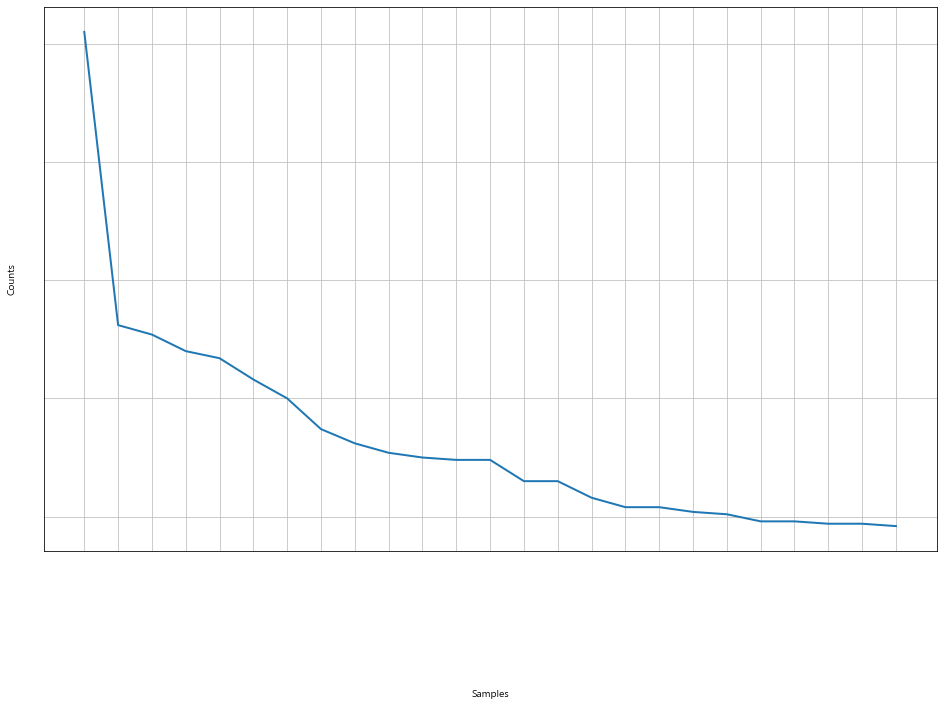

In [31]:
month_freq_analysis(df, '2020-06-01', '2020-06-30')